# Lab 5 ASTR 400B 


In [1]:
# Import Modules 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import constants as const # import astropy constants
import astropy.units as u

# Part A :  Mass to Light Ratios 

Wolf et al. 2010 

$M(<R_{half}) = \frac {4}{G}\sigma^2 R_e$

Where $R_{half}$ = 3D half mass radius 
and $R_e$ is the 2D half mass radius of stars (observed)

Determine which of the following two systems are galaxies:

The system 47 Tuc is observed with:  $\sigma = 17.3$ km/s, $R_e = 0.5$ pc, $L_v \sim 10^5 L_\odot$ 

The system Willman I is observed with: $\sigma = 4.3$ km/s, $R_e = 25$ pc, $L_v = 10^3 L_\odot$

In [2]:
# Gravitational Constant in the desired units
# kpc^3/Gyr^2/Msun
Grav = const.G.to(u.kpc**3/u.Gyr**2/u.Msun)

In [3]:
def WolfMass(sigma, re):
    """ Function that defines the Wolf mass estimator from Wolf+ 2010
    PARAMETERS
    ----------
        sigma: astropy quantity
            1D line of sight velocity dispersion in km/s
        re: astropy quantity
            Effective radius, 2D radius enclosing half the
            stellar mass in kpc
    OUTPUTS
    -------
        mWolf: Returns the dynamical mass within the 
            half light radius in Msun
    """
    sigmaKpcGyr = sigma.to(u.kpc/u.Gyr)
    mWolf = 4/Grav*sigmaKpcGyr**2*re
    return mWolf

In [9]:
TucSig = 17.3*u.km/u.s
TucRe = 0.5*u.pc
TucL = 1e5*u.Lsun
WilmanSig = 4.3*u.km/u.s
WilmanRe = 25*u.pc
WilmanL = 1e3*u.Lsun
print(f"47 Tuc: {WolfMass(TucSig, TucRe.to(u.kpc)):.2e}\nWilman 1: {WolfMass(WilmanSig, WilmanRe.to(u.kpc)):.2e}")
# Wilman 1 has way less luminosity than it should based on the mass amounts (~10^3 Lsun vs. 4.3e5 Msun)
# 47 Tuc has ~ the same mass and Luminosity, both ~10^3

47 Tuc: 1.39e+05 solMass
Wilman 1: 4.30e+05 solMass


# Part B :  Stellar to Halo Mass Relation

Following the work of [Moster et al. 2013 (MNRAS, 428, 3121)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.428.3121M/abstract)


`Equation 2:`                  $ \frac{m}{M} = 2N \left [ \left ( \frac{M}{M_1} \right)^{-\beta} + \left (\frac{M}{M_1} \right)^{\gamma} \right]$ 

$m$ = stellar mass, $M$ = halo mass

`Equation 11:`        log $M_1(z) = M_{10} + M_{11} \frac{z}{z+1} $ 

`Equation 12:`        $N(z) = N_{10} + N_{11} \frac{z}{z+1} $

`Equation 13:`         $\beta(z) = \beta_{10} + \beta_{11} \frac{z}{z+1} $

`Equation 14:`         $\gamma(z) = \gamma_{10} + \gamma_{11} \frac{z}{z+1} $

# Q1 

Modify the class below by adding a function called `StellarMass` that uses the `SHMratio` function and returns the stellar mass.

In [10]:
class AbundanceMatching:
    """ Class to define the abundance matching relations from 
    Moster et al. 2013"""
    
    
    def __init__(self, mhalo, z):
        """ Initialize the class
        PARAMETERS
        ----------
            mhalo: float
                Halo mass in Msun
            z: float
                redshift
        """
        
        #initializing the parameters:
        self.mhalo = mhalo # Halo Mass in Msun
        self.z = z  # Redshift
        
        
    def logM1(self):
        """eq. 11 of Moster 2013
        OUTPUT: 
            M1: float 
                characteristic mass in log(Msun)
        """
        M10      = 11.59
        M11      = 1.195 
        return M10 + M11*(self.z/(1+self.z))  
    
    
    def N(self):
        """eq. 12 of Moster 2013
        OUTPUT: 
            Normalization for eq. 2
        """
        N10      = 0.0351
        N11      = -0.0247
    
        return N10 + N11*(self.z/(1+self.z))
    
    
    def Beta(self):
        """eq. 13 of Moster 2013
        OUTPUT:  power of the low mass slope"""
        beta10      = 1.376
        beta11      = -0.826
    
        return beta10 + beta11*(self.z/(1+self.z))
    
    def Gamma(self):
        """eq. 14 of Moster 2013
        OUTPUT: power of the high mass slope """
        gamma10      = 0.608
        gamma11      = 0.329
    
        return gamma10 + gamma11*(self.z/(1+self.z))
    
    
    def SHMratio(self):
        """ 
        eq. 2 of Moster + 2013
        OUTPUT: 
            SHMratio float
                Stellar mass to halo mass ratio
        """
        M1 = 10**self.logM1() # Converting characteristic mass 
        # to Msun from Log(Msun)
        A = (self.mhalo/M1)**(-self.Beta())  # Low mass end
        B = (self.mhalo/M1)**(self.Gamma())   # High mass end
        Norm = 2*self.N() # Normalization
    
        SHMratio = Norm*(A+B)**(-1)
    
        return SHMratio
    
    
 # Q1: add a function to the class that takes the SHM ratio and returns 
# The stellar mass 
    def stellarMass(self):
        '''
        Method to compute the stellar mass of a galaxy with a
        given SHM ratio from eq. 2 of Moster 2013
        
        Returns:
            (float) stellar mass in Msun
        '''
        return self.mhalo*self.SHMratio()


# Part C : Plot the Moster Relation

Reproduce the below figure from Moster + 2013 
Plot this for z=0, 0.5, 1, 2

![mos](./MosterFig.png)

In [11]:
mh = np.logspace(10,15,1000) # Logarithmically spaced array

In [12]:
# Define Instances of the Class for each redshift
MosterZ0 = AbundanceMatching(mh,0)
MosterZ1 = AbundanceMatching(mh, 1)
MosterZ2 = AbundanceMatching(mh, 2)

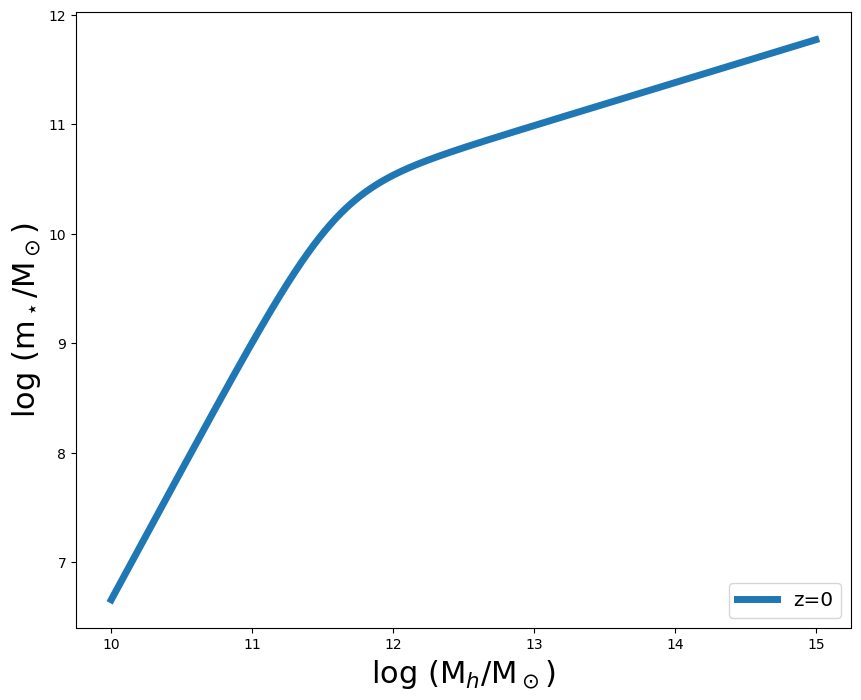

In [13]:

fig,ax = plt.subplots(figsize=(10,8))


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot z = 0
plt.plot(np.log10(mh), np.log10(MosterZ0.stellarMass()),
         linewidth = 5, label='z=0')

# Continue plotting for the other redshifts here




# Axes labels 
plt.xlabel('log (M$_h$/M$_\odot$)',fontsize=22) 
plt.ylabel('log (m$_\star$/M$_\odot$)', fontsize=22)

# Legend
plt.legend(loc='lower right',fontsize='x-large')

# save the file 
plt.savefig('AbundanceMatching_Lab5.png')



# Part D

# Q1

In traditional models of the Magellanic Clouds (prior to 2010), the LMC is thought to have a halo mass of order $3 \times 10^{10}$ M$_\odot$.  According to LCDM theory, what should be the stellar mass of such a halo?  

How does this compare against the actual observed stellar mass of the LMC at the present day of $3 \times 10^9$ M$_\odot$ ? 

What is the $\Lambda$CDM expected halo mass? What is the origin of any discrepancy? 

# Q2


What is the expected stellar mass of an L* galaxy at z=0? 

What is the expected stellar mass of an L* galaxy at z = 2?  